In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load and read data 

In [260]:
red = pd.read_csv('winequality-red.csv',sep=";")
white = pd.read_csv('winequality-white.csv',sep=";")



In [261]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [262]:
red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [263]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Plot and describe the data set

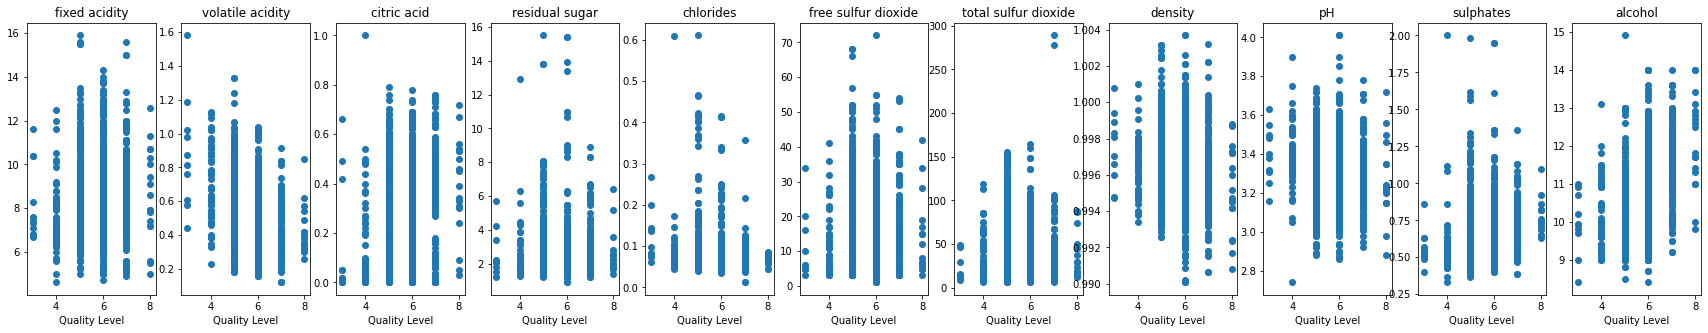

In [264]:
fig, axes = plt.subplots(1,11,figsize=(30,5))
for i,ax in enumerate (axes.ravel()):
    ax.scatter (x=red["quality"],y=red[red.columns[i]],)
    ax.set_title(red.columns[i])
    ax.set_xlabel('Quality Level')

In [265]:
white.shape

(4898, 12)

In [266]:
X = red[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
         'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].values
X.shape

(1599, 11)

In [267]:
y = red['quality'].values.reshape(-1,1)
y.shape

(1599, 1)

# Multiple regression models for all features

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 12)

X = X[:,0].reshape(-1,1)
X.shape

(1599, 1)

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test,y_test)

0.32609824481483796

In [289]:
y_pred = reg.predict(X_test)
print('R^2 Score :%.3f' % r2_score(y_test,y_pred))
 

R^2 Score :0.326


In [290]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [291]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_multi_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [182]:
param_grid = {'alpha': np.logspace(-3,1,20)}
print(param_grid)

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_ridge = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)

grid_ridge.fit(X_train, y_train)

{'alpha': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01])}


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01])},
             return_train_score=True)

In [183]:
best_param_ridge = grid_ridge.best_params_
best_param_ridge

{'alpha': 0.07847599703514611}

In [184]:
ridge = Ridge( alpha = best_param_ridge['alpha'])
ridge.fit(X_train, y_train)

Ridge(alpha=0.07847599703514611)

In [185]:
ridge_score = ridge.score(X_test,y_test)
ridge_score

0.3257314156491875

# Apply Decision Tree


In [186]:
#features=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
#red=red[features]

#X = red.loc['fixed acidity':'alcohol'].values
#y = red['quality'].values.reshape(-1,1)

#len(red)

X = red[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
         'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].values
X.shape

y = red['quality'].values.reshape(-1,1)
y.shape

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [234]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)



DecisionTreeClassifier(max_depth=3)

In [235]:
tree_dot = export_graphviz(tree,out_file=None, feature_names=["fixed acidity","volatile acidity",
                                                              "citric acid","residual sugar","chlorides",
                                                              "free sulfur dioxide","total sulfur dioxide",
                                                              "density","pH","sulphates","alcohol"])
tree_dot

'digraph Tree {\nnode [shape=box] ;\n0 [label="alcohol <= 10.917\\ngini = 0.674\\nsamples = 3428\\nvalue = [12, 121, 1026, 1548, 596, 120, 5]"] ;\n1 [label="volatile acidity <= 0.267\\ngini = 0.627\\nsamples = 2258\\nvalue = [6, 96, 923, 999, 200, 33, 1]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="volatile acidity <= 0.207\\ngini = 0.614\\nsamples = 1186\\nvalue = [3, 19, 332, 635, 167, 30, 0]"] ;\n1 -> 2 ;\n3 [label="gini = 0.62\\nsamples = 529\\nvalue = [2, 7, 99, 290, 109, 22, 0]"] ;\n2 -> 3 ;\n4 [label="gini = 0.59\\nsamples = 657\\nvalue = [1, 12, 233, 345, 58, 8, 0]"] ;\n2 -> 4 ;\n5 [label="alcohol <= 10.017\\ngini = 0.575\\nsamples = 1072\\nvalue = [3, 77, 591, 364, 33, 3, 1]"] ;\n1 -> 5 ;\n6 [label="gini = 0.523\\nsamples = 771\\nvalue = [2, 48, 476, 234, 11, 0, 0]"] ;\n5 -> 6 ;\n7 [label="gini = 0.653\\nsamples = 301\\nvalue = [1, 29, 115, 130, 22, 3, 1]"] ;\n5 -> 7 ;\n8 [label="alcohol <= 12.55\\ngini = 0.651\\nsamples = 1170\\nvalue = [6, 25

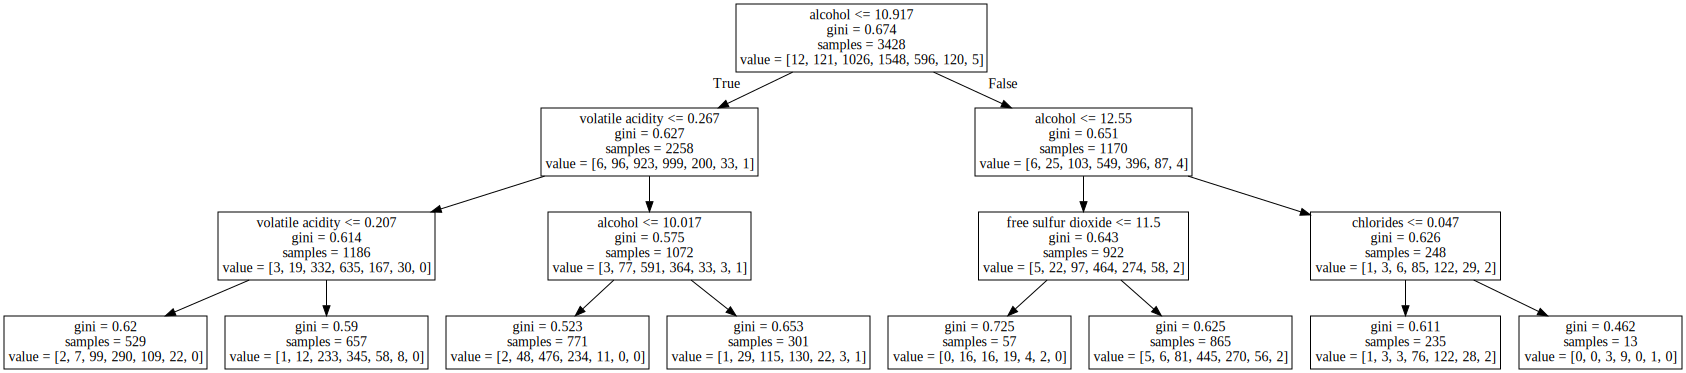

In [236]:
graphviz.Source(tree_dot)

# Tune Hyperparameter

In [237]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_leaf_nodes': range(2,20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, 
                    cv =10, return_train_score = True)

grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_leaf_nodes': range(2, 20)},
             return_train_score=True)

In [238]:
best_tree = grid.best_estimator_ 

In [239]:
best_tree_dot = export_graphviz(best_tree, out_file=None, feature_names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"])
best_tree_dot

'digraph Tree {\nnode [shape=box] ;\n0 [label="alcohol <= 10.917\\ngini = 0.674\\nsamples = 3428\\nvalue = [12, 121, 1026, 1548, 596, 120, 5]"] ;\n1 [label="volatile acidity <= 0.267\\ngini = 0.627\\nsamples = 2258\\nvalue = [6, 96, 923, 999, 200, 33, 1]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n3 [label="gini = 0.614\\nsamples = 1186\\nvalue = [3, 19, 332, 635, 167, 30, 0]"] ;\n1 -> 3 ;\n4 [label="alcohol <= 10.017\\ngini = 0.575\\nsamples = 1072\\nvalue = [3, 77, 591, 364, 33, 3, 1]"] ;\n1 -> 4 ;\n5 [label="gini = 0.523\\nsamples = 771\\nvalue = [2, 48, 476, 234, 11, 0, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.653\\nsamples = 301\\nvalue = [1, 29, 115, 130, 22, 3, 1]"] ;\n4 -> 6 ;\n2 [label="alcohol <= 12.55\\ngini = 0.651\\nsamples = 1170\\nvalue = [6, 25, 103, 549, 396, 87, 4]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="gini = 0.643\\nsamples = 922\\nvalue = [5, 22, 97, 464, 274, 58, 2]"] ;\n2 -> 7 ;\n8 [label="gini = 0.626\

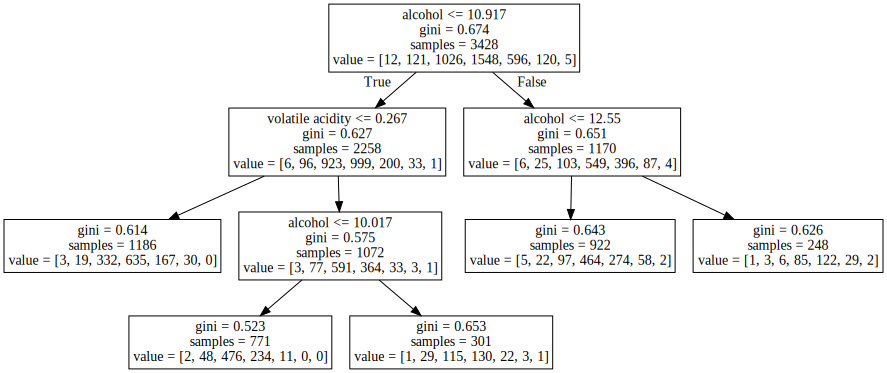

In [240]:
graphviz.Source(best_tree_dot)

In [241]:
grid.score(X_test,y_test)

0.5149659863945578

In [246]:
from sklearn.model_selection import train_test_split
y= red.quality 
X =red.drop('quality',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [247]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_train_stdscaled= preprocessing.StandardScaler(X_train)
display(X_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass copy=      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1143            7.0             0.220         0.30             1.8      0.065   
1001            9.9             0.350         0.38             1.5      0.058   
517            10.4             0.610         0.49             2.1      0.200   
275             7.9             0.545         0.06             4.0      0.087   
1134            8.5             0.280         0.35             1.7      0.061   
...             ...               ...          ...             ...        ...   
649             6.7             0.420         0.27             8.6      0.068   
842            10.6             0.500         0.45             2.6      0.119   
802             5.1             0.585         0.00             1.7      0.044   
960             8.5             0.470         0.27             1.9      0.058   
533      

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1143            7.0             0.220         0.30             1.8      0.065   
1001            9.9             0.350         0.38             1.5      0.058   
517            10.4             0.610         0.49             2.1      0.200   
275             7.9             0.545         0.06             4.0      0.087   
1134            8.5             0.280         0.35             1.7      0.061   
...             ...               ...          ...             ...        ...   
649             6.7             0.420         0.27             8.6      0.068   
842            10.6             0.500         0.45             2.6      0.119   
802             5.1             0.585         0.00             1.7      0.044   
960             8.5             0.470         0.27             1.9      0.058   
533            10.3             0.270         0.24             2.1      0.072   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1143                 16.0                  20.0  0.99672  3.61       0.82   
1001                 31.0                  47.0  0.99676  3.26       0.82   
517                   5.0                  16.0  0.99940  3.16       0.63   
275                  27.0                  61.0  0.99650  3.36       0.67   
1134                  6.0                  15.0  0.99524  3.30       0.74   
...                   ...                   ...      ...   ...        ...   
649                  24.0                 148.0  0.99480  3.16       0.57   
842                  34.0                  68.0  0.99708  3.23       0.72   
802                  14.0                  86.0  0.99264  3.56       0.94   
960                  18.0                  38.0  0.99518  3.16       0.85   
533                  15.0                  33.0  0.99560  3.22       0.66   

      alcohol  
1143     10.0  
1001     10.6  
517       8.4  
275      10.7  
1134     11.8  
...       ...  
649      11.3  
842      10.9  
802      12.9  
960      11.1  
533      12.8  

[1119 rows x 11 columns]

In [248]:
from sklearn.tree import DecisionTreeClassifier
wine_tree = DecisionTreeClassifier()
wine_tree.fit(X_train,y_train)
y_pred_tree = wine_tree.predict(X_test)

In [255]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_tree))


0.625


In [254]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        13
           5       0.71      0.69      0.70       208
           6       0.58      0.66      0.62       186
           7       0.61      0.48      0.54        64
           8       0.67      0.40      0.50         5

    accuracy                           0.62       480
   macro avg       0.43      0.37      0.39       480
weighted avg       0.62      0.62      0.62       480

